# **World Population Dataset**
## **PHASE 1 REPORT - Data Preperation and Visualization**

   Group Number - 11
 
 - Group Members and IDs
    * Aarav Jain
    * Ahnaf Tausif
    * Kushagra Baghel
    * Mayank Deepak Thakkar
    * Vishwas Aggarwal

## Table of Contents

## Introduction <a id='itr'></a>

### Dataset Source

The World Population Dataset used in this report was sourced from Kaggle(Sourabh Banerjee,2022). This dataset contains the information about the World Population from 1970 to 2022.

### Dataset Information

The World Population Dataset is about the population of the world throughout each decade from 1970 to 2022. The dataset records the population of each country. It has features 

**Dataset Retrieval**

Read and Display 10 randomly selected rows from the dataset.

In [13]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")


In [14]:
df_grp11 = pd.read_csv('world_population.csv')

In [15]:
df_grp11.sample(10, random_state=999)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
140,26,MMR,Myanmar,Nay Pyi Taw,Asia,54179306,53423198,51483949,49390988,45538332,40099553,33465781,27284112,676578,80.0784,1.0071,0.68
20,177,BLZ,Belize,Belmopan,North America,405272,394921,359871,322106,240406,182589,145133,120905,22966,17.6466,1.0131,0.01
42,28,COL,Colombia,Bogota,South America,51874024,50930662,47119728,44816108,39215135,32601393,26176195,20905254,1141748,45.4339,1.0069,0.65
204,95,TJK,Tajikistan,Dushanbe,Asia,9952787,9543207,8524063,7621779,6272998,5417860,4045965,2993019,143100,69.5513,1.0208,0.12
146,123,NZL,New Zealand,Wellington,Oceania,5185288,5061133,4590590,4346338,3855266,3397389,3147168,2824061,270467,19.1716,1.0108,0.07
85,149,GNB,Guinea-Bissau,Bissau,Africa,2105566,2015828,1788919,1567220,1230849,973551,831462,591663,36125,58.2856,1.0218,0.03
86,164,GUY,Guyana,Georgetown,South America,808726,797202,755031,747932,759051,747116,778176,705261,214969,3.7621,1.0052,0.01
151,56,PRK,North Korea,Pyongyang,Asia,26069416,25867467,25258015,24686435,23367059,20799523,17973650,14996879,120538,216.2755,1.0038,0.33
208,100,TGO,Togo,Lomé,Africa,8848699,8442580,7473229,6571855,5008035,3875947,2838110,2197383,56785,155.8281,1.0236,0.11
164,37,POL,Poland,Warsaw,Europe,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,312679,127.4698,1.0404,0.50


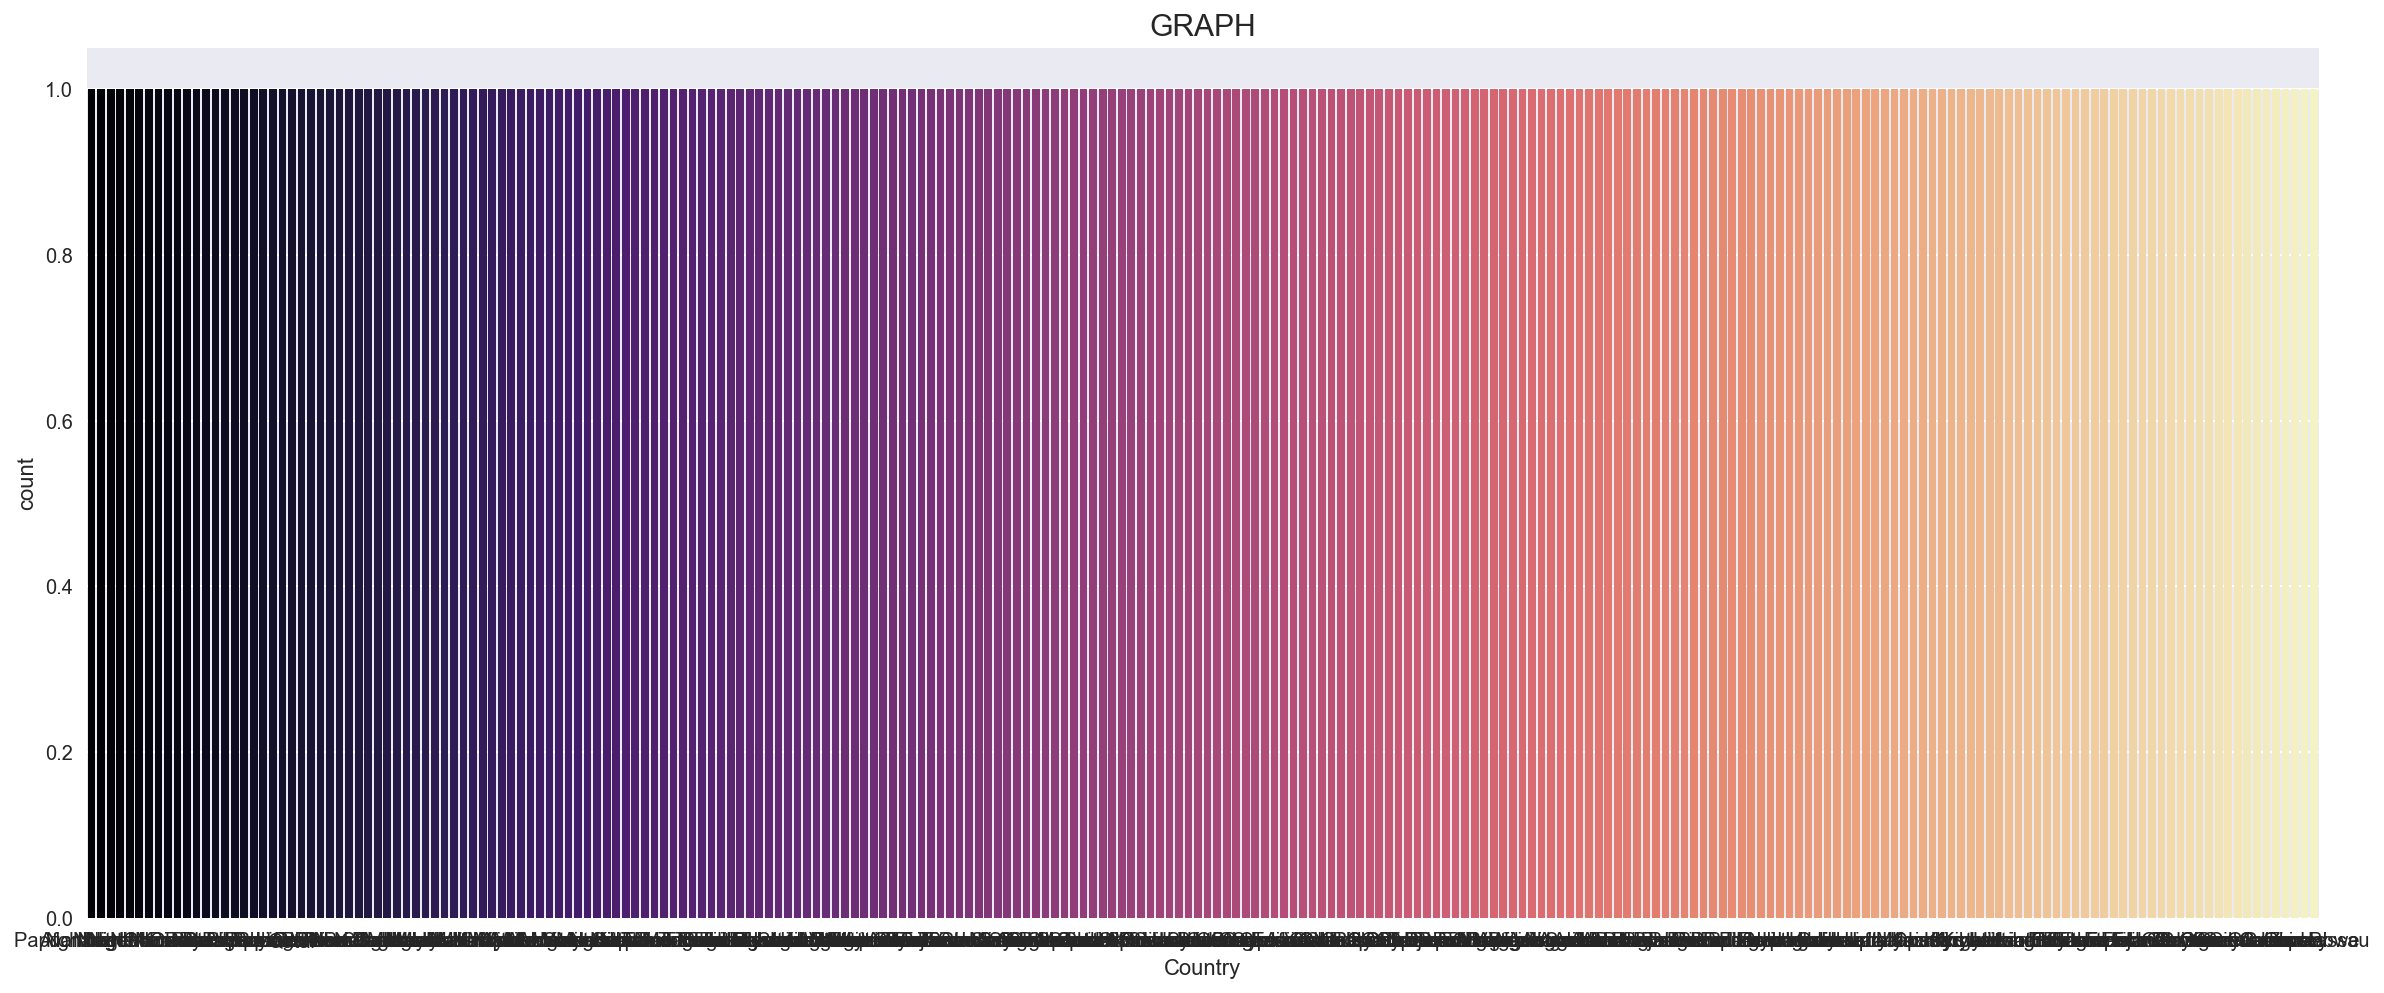

In [16]:

plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'Country', data = df_grp11, palette = 'magma', 
                    order = df_grp11['Country'].value_counts().index)
fig = plt.title('GRAPH', fontsize = 15)
plt.show()

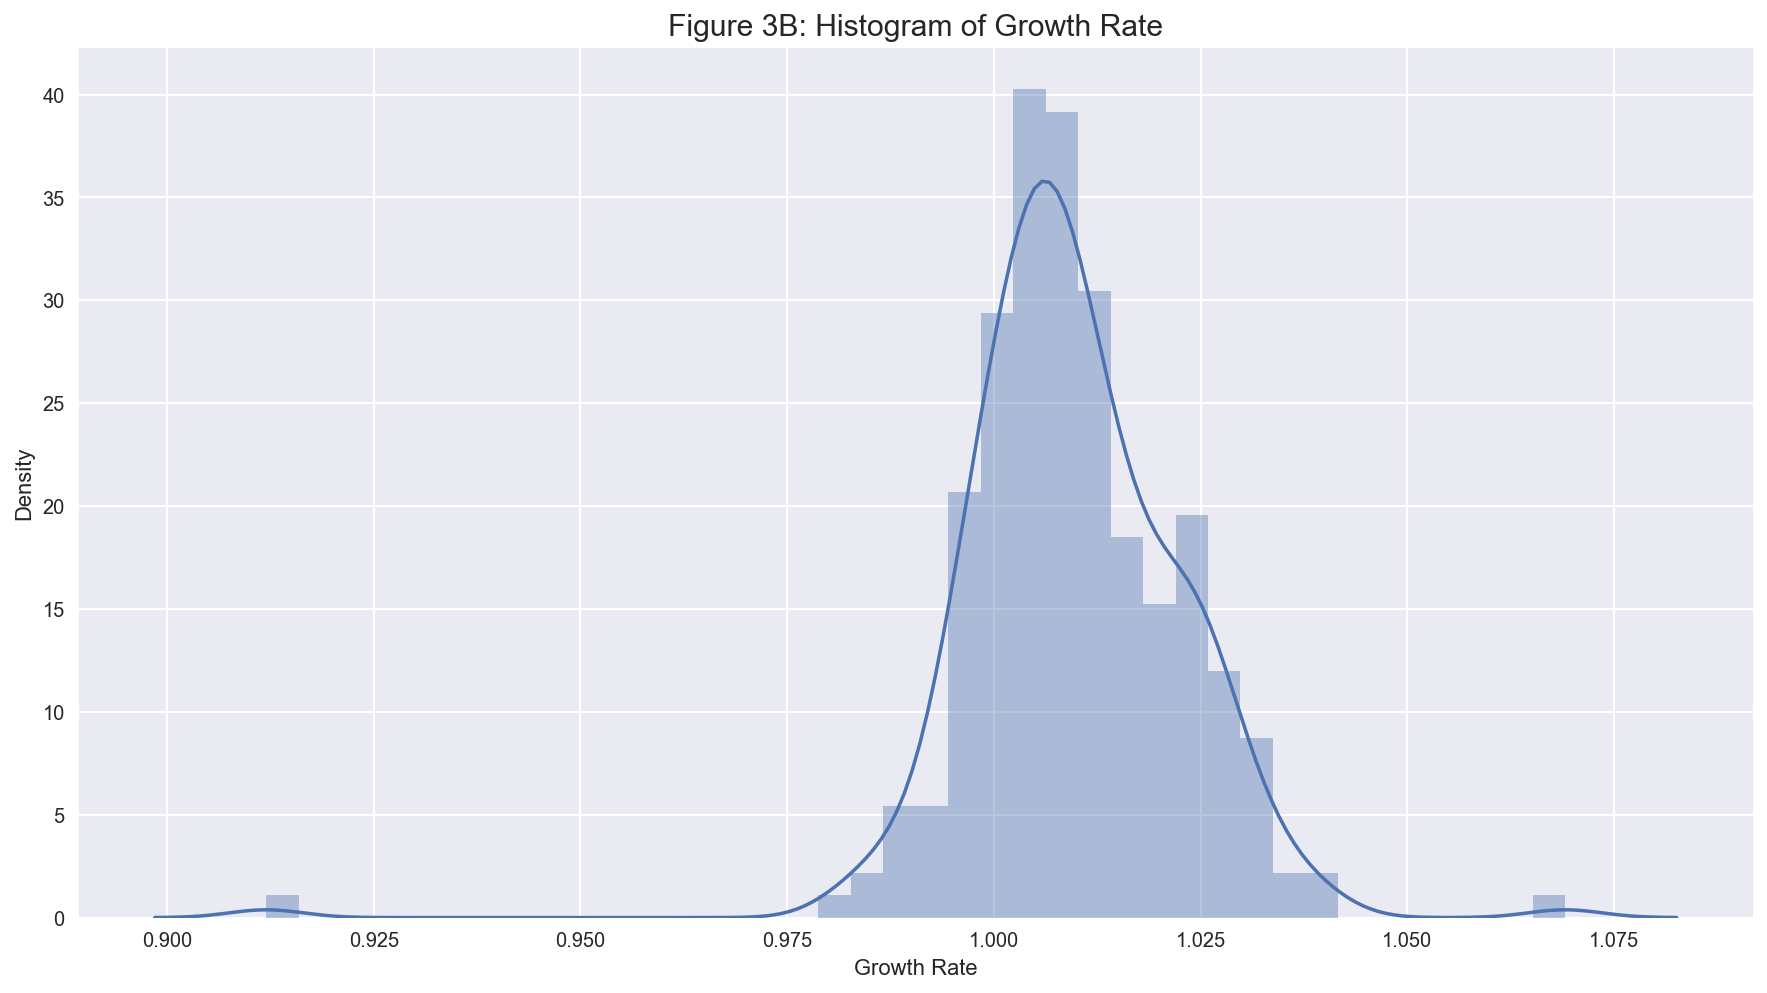

In [17]:
# Boxplot of Price
plt.figure(figsize = (15,8))
sns.distplot(df_grp11['Growth Rate'], kde=True, bins=40,).set_title('Figure 3B: Histogram of Growth Rate', fontsize = 15)
plt.show();

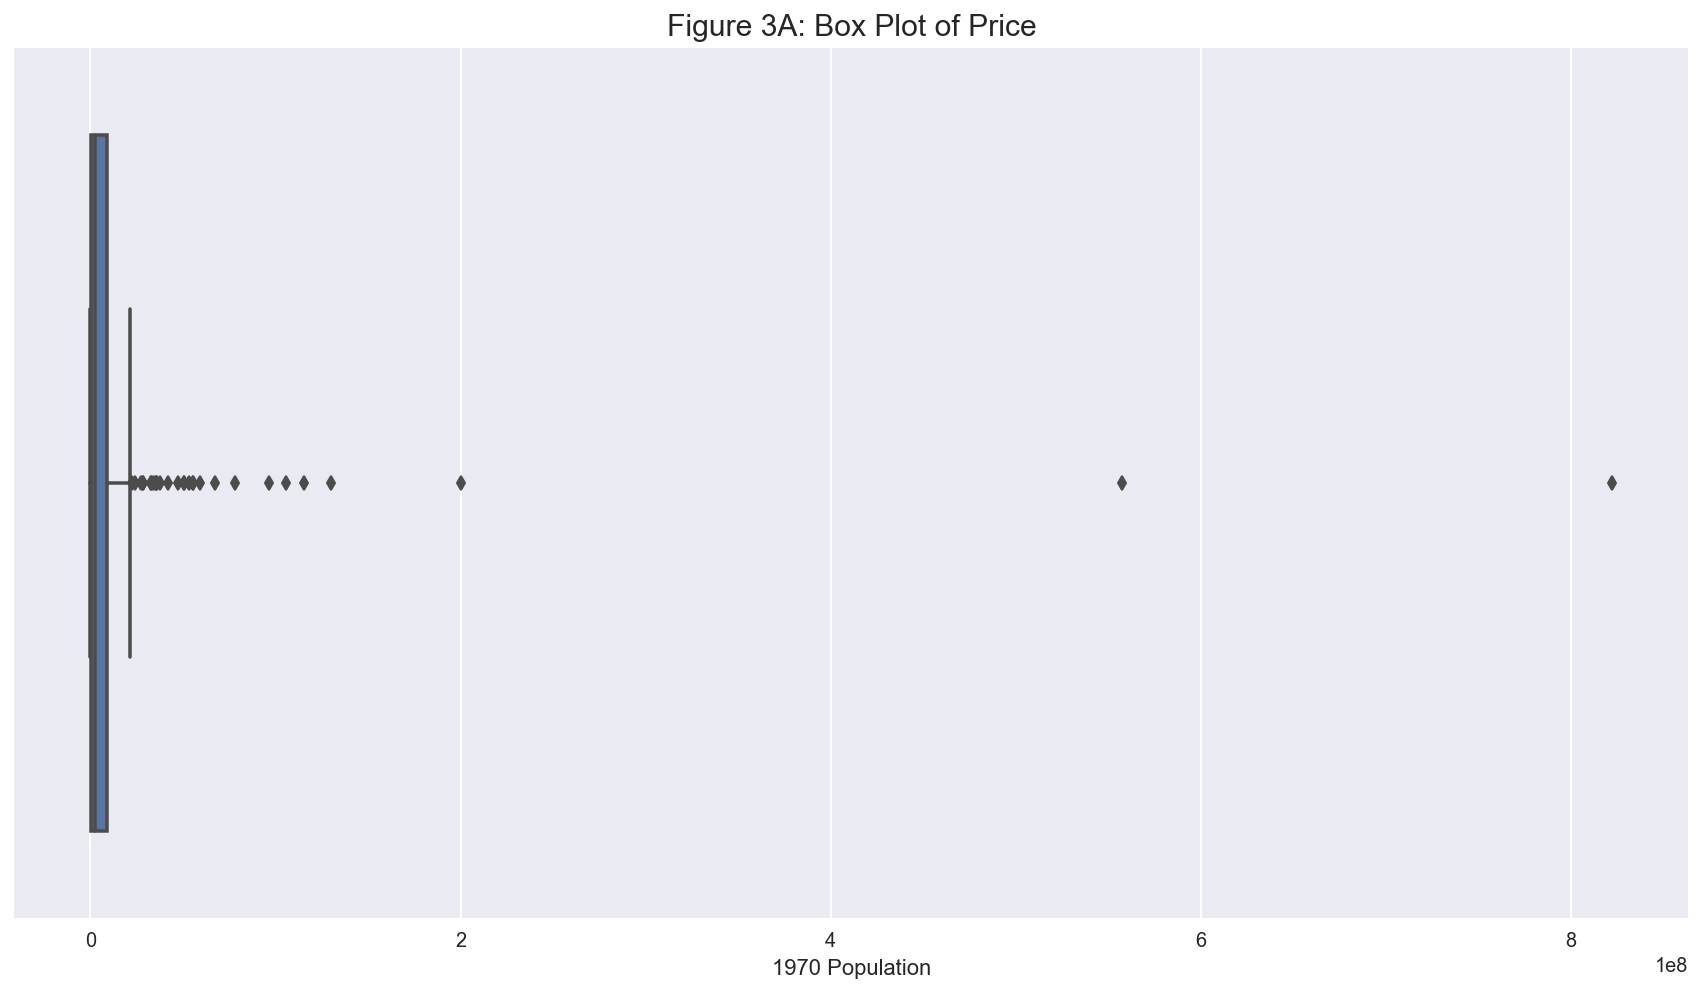

In [23]:
# Boxplot of Price
plt.figure(figsize = (15,8))
sns.boxplot(df_grp11['1970 Population']).set_title('Figure 3A: Box Plot of Price', fontsize = 15)
plt.show();

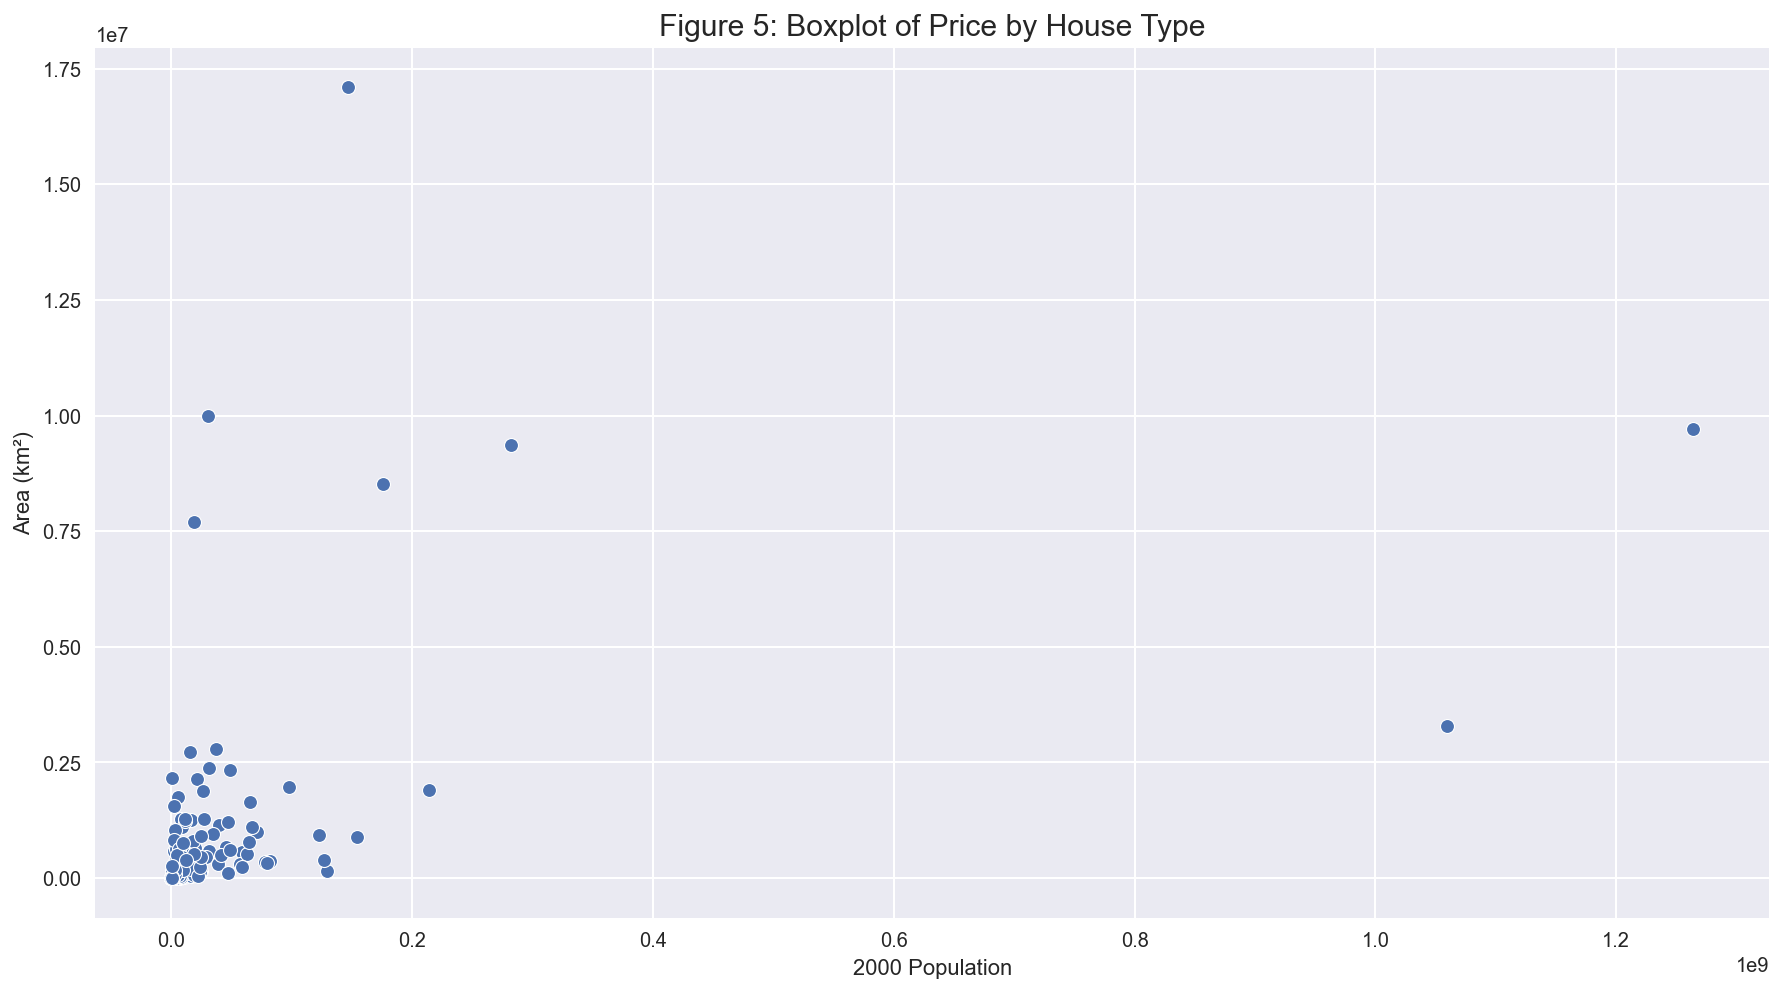

In [27]:
plt.figure(figsize = (15,8))
sns.scatterplot(df_grp11['2000 Population'], df_grp11['Area (km²)']);
plt.title('Figure 5: Boxplot of Price by House Type', fontsize = 15)
plt.show();